# SVM

In [2]:
import pandas as pd
#加载数据集，需要把数据放到目录中
data = pd.read_csv('C:\\Users\\tanling\\deeplearning\\breast_cancer_data\\data.csv')

In [3]:
#数据探索
#因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns',None)
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [4]:
print(data.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

In [5]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## 数据清洗

In [6]:
#将特征字段分成3组
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])
#数据清洗
#ID列没有用，删除该列
data.drop("id",axis = 1,inplace = True)
#将B良性替换为0，M恶行替换为1
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

## 特征字段筛选

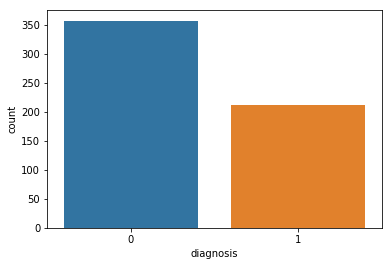

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label = "Count")
plt.show()

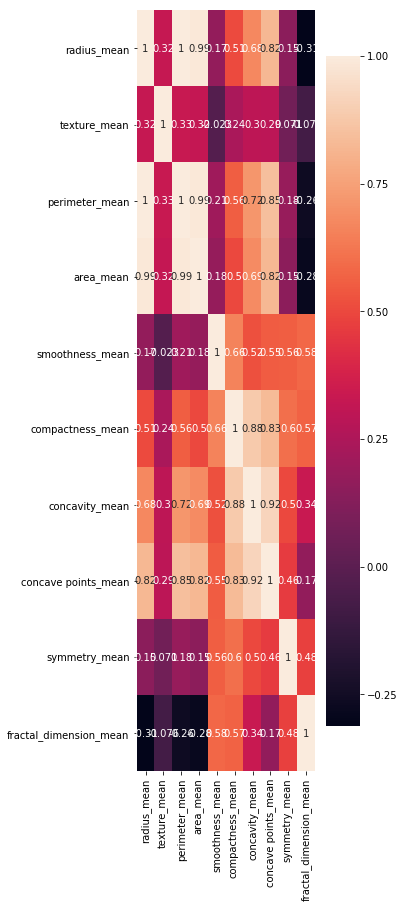

In [13]:
#用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize = (4,14))
#annot = True 显示每个方格的数据
sns.heatmap(corr,annot = True)
plt.show()

In [15]:

# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
#抽取30%的数据作为测试集,其余作为训练集
train,test = train_test_split(data,test_size = 0.3)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']

In [21]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#采用Z-SCORE规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [23]:
#创建SVM分类器
model = svm.SVC()
#用训练集做训练
model.fit(train_X,train_y)
#用测试集作业测
prediction = model.predict(test_X)
print('准确率：',metrics.accuracy_score(prediction,test_y))

准确率： 0.9064327485380117
